# Data wrangling

The data wrangling part for Capstone 2 - COVID-19 sruvival prediction.


# Data description
The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

    sex: 1 for female and 2 for male.
        age: of the patient.
    classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
        degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
    patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
    pneumonia: whether the patient already have air sacs inflammation or not.
    pregnancy: whether the patient is pregnant or not.
    diabetes: whether the patient has diabetes or not.
    copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
    asthma: whether the patient has asthma or not.
    inmsupr: whether the patient is immunosuppressed or not.
    hypertension: whether the patient has hypertension or not.
    cardiovascular: whether the patient has heart or blood vessels related disease.
    renal chronic: whether the patient has chronic renal disease or not.
    other disease: whether the patient has other disease or not.
    obesity: whether the patient is obese or not.
    tobacco: whether the patient is a tobacco user.
    usmr: Indicates whether the patient treated medical units of the first, second or third level.
    medical unit: type of institution of the National Health System that provided the care.
    intubed: whether the patient was connected to the ventilator.
    icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
    date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [28]:
# import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [29]:
# import the data set
# data is retrieved from https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data
raw_df = pd.read_csv('C:/Users/Angela/casestudy/Capstone_Two/data/Covid Data.csv')
raw_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [11]:
raw_df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

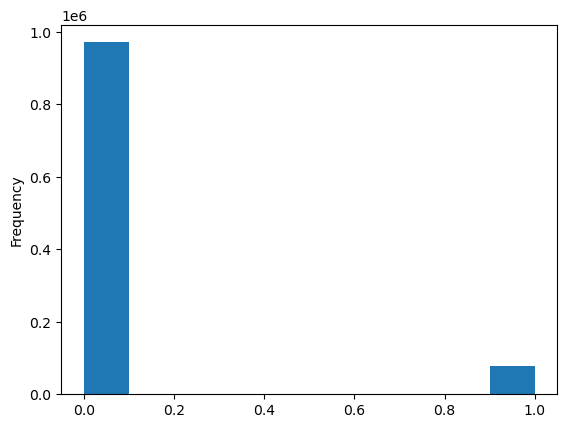

In [13]:
# transform the column 'DATE_DIED' to binary data for survival prediction: 1 for died, 0 otherwise
raw_data = raw_df.copy()
raw_data['DATE_DIED'] = [0 if val == '9999-99-99' else 1 for val in raw_df['DATE_DIED']]
raw_data.rename(columns={'DATE_DIED': 'DEATH'}, inplace=True)
raw_data['DEATH'].plot(kind = 'hist')
plt.show()

In [14]:
# create subset of columns of binary variables from dataframe and check for missing values
binary_columns = ['SEX', 'PATIENT_TYPE','INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 
                  'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC', 'TOBACCO', 'ICU']
binary_df = raw_data[binary_columns]


In [15]:
raw_data[binary_columns] = raw_data[binary_columns].replace({2: 0})

In [16]:
for col in binary_columns:
    print(raw_data[col].value_counts())


1    525064
0    523511
Name: SEX, dtype: int64
1    848544
0    200031
Name: PATIENT_TYPE, dtype: int64
97    848544
0     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
0     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
97    523511
0     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64
0     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
0     1030510
1       15062
98       3003
Name: COPD, dtype: int64
0     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64
0     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64
0     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64
0     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64
0     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64
0     885727
1     159816
98      3032
Name: OBESITY, dtype: int64
0     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64
0     960979
1      843

In [17]:
# there are three numbers needs to be replaced with NA: 97, 98, 99
values_to_replace = [97, 98, 99]
for col in binary_columns:
    raw_data[col].replace(values_to_replace, pd.NA, inplace=True)

missing = pd.concat([raw_data.isnull().sum(), 100 * raw_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
USMER,0,0.000000
MEDICAL_UNIT,0,0.000000
SEX,0,0.000000
PATIENT_TYPE,0,0.000000
DEATH,0,0.000000
AGE,0,0.000000
CLASIFFICATION_FINAL,0,0.000000
ASTHMA,2979,0.284100
COPD,3003,0.286389
RENAL_CHRONIC,3006,0.286675


In [18]:
# from above, columns 'ICU', 'INTUBED', and 'PREGNANT' should be dropped due to more than 50% data missing
raw_data = raw_data.drop(['ICU','INTUBED', 'PREGNANT'], axis = 1)
raw_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,0,0,0,0,1,0,0,0,0,0,3
1,2,1,0,1,1,1,72,0,0,0,0,1,0,0,1,1,0,5
2,2,1,0,0,1,0,55,1,0,0,0,0,0,0,0,0,0,3
3,2,1,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,7
4,2,1,0,1,1,0,68,1,0,0,0,1,0,0,0,0,0,3


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DEATH                 1048575 non-null  int64 
 5   PNEUMONIA             1032572 non-null  object
 6   AGE                   1048575 non-null  int64 
 7   DIABETES              1045237 non-null  object
 8   COPD                  1045572 non-null  object
 9   ASTHMA                1045596 non-null  object
 10  INMSUPR               1045171 non-null  object
 11  HIPERTENSION          1045471 non-null  object
 12  OTHER_DISEASE         1043530 non-null  object
 13  CARDIOVASCULAR        1045499 non-null  object
 14  OBESITY               1045543 non-null  object
 15

In [20]:
# fill the remaining columns that contains missing values with their modes
missing_columns = ['PNEUMONIA', 'OTHER_DISEASE', 'INMSUPR', 'DIABETES', 'TOBACCO', 
                   'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'COPD', 'ASTHMA']
for col in missing_columns:
    raw_data[col].fillna(raw_data[col].mode().iloc[0], inplace=True)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   DEATH                 1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   DIABETES              1048575 non-null  int64
 8   COPD                  1048575 non-null  int64
 9   ASTHMA                1048575 non-null  int64
 10  INMSUPR               1048575 non-null  int64
 11  HIPERTENSION          1048575 non-null  int64
 12  OTHER_DISEASE         1048575 non-null  int64
 13  CARDIOVASCULAR        1048575 non-null  int64
 14  OBESITY               1048575 non-null  int64
 15  RENAL_CHRONIC  

In [23]:
# check if there is any missing values again
missing = pd.concat([raw_data.isnull().sum(), 100 * raw_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
USMER,0,0.0
MEDICAL_UNIT,0,0.0
SEX,0,0.0
PATIENT_TYPE,0,0.0
DEATH,0,0.0
PNEUMONIA,0,0.0
AGE,0,0.0
DIABETES,0,0.0
COPD,0,0.0
ASTHMA,0,0.0


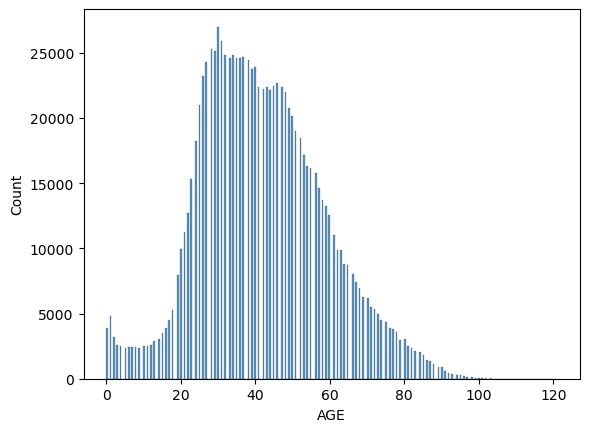

In [24]:
# check the distribution of column 'AGE'
sns.histplot(x=raw_data.AGE)
plt.show()


In [22]:
# save the data to a new csv file
os.makedirs('/Users/Angela/casestudy/Capstone_Two/data', exist_ok=True)  
raw_data.to_csv('/Users/Angela/casestudy/Capstone_Two/data/covid_data_cleaned.csv')  


In [77]:
raw_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,0,0,0,0,1,0,0,0,0,0,3
1,2,1,0,1,1,1,72,0,0,0,0,1,0,0,1,1,0,5
2,2,1,0,0,1,0,55,1,0,0,0,0,0,0,0,0,0,3
3,2,1,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,7
4,2,1,0,1,1,0,68,1,0,0,0,1,0,0,0,0,0,3


In [25]:
raw_data.shape

(1048575, 18)

After cleaning, the dataset consists of 18 unique features and 1,048,575 unique patients. For sex column, 1 means female and 0 means male. In the Boolean features, 1 means "yes" for having such condition, and 0 means "no" such condition. The missing data was replaced by mode. 